## Seung Jun Choi in Urban Information Lab
### Classification Exercise

In [1]:
#Print version of Python and Numpy
import sys
import numpy as np

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")

Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:09:21) [Clang 14.0.6 ]
NumPy version: 2.3.2


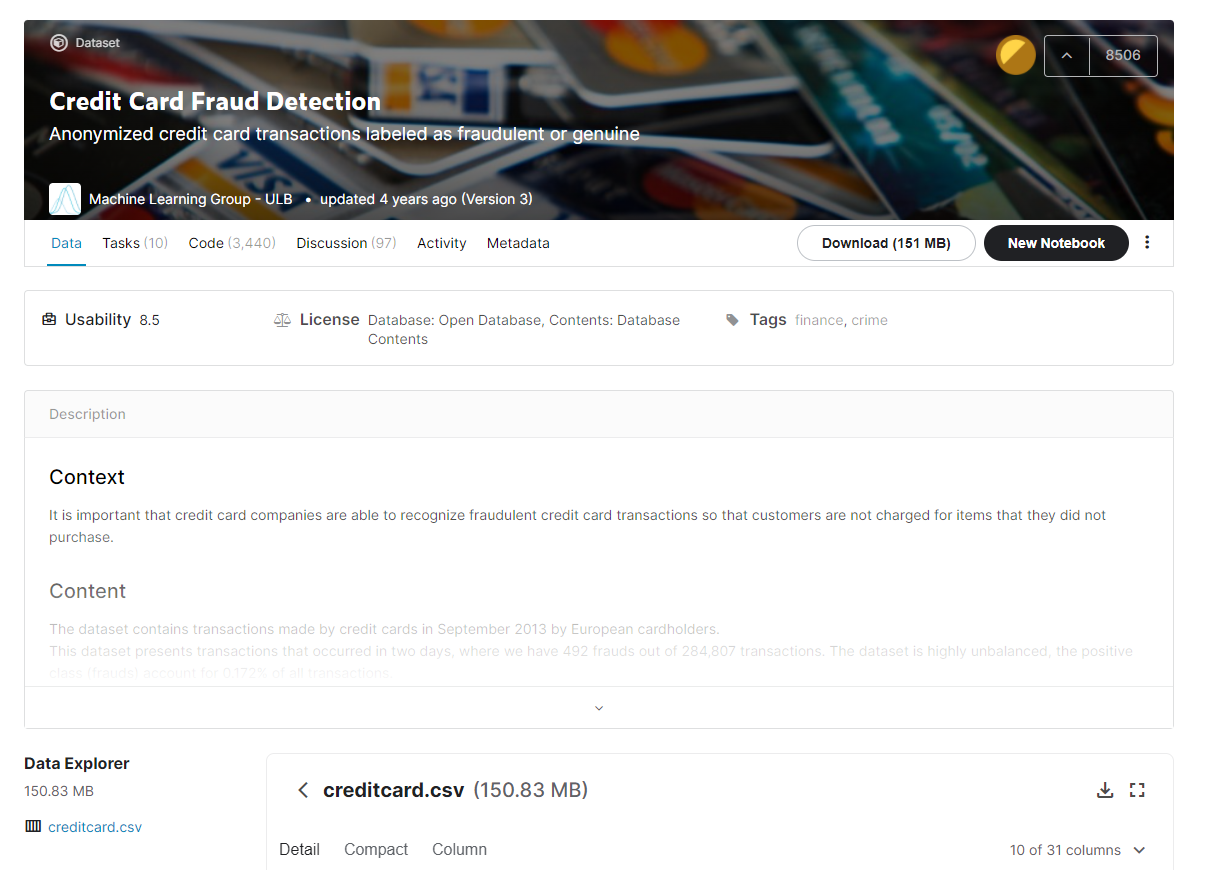

In [2]:
#After downloading the file, please unzip before running this cell 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## This kind of data is called imbalanced data
### Becasue fraud cases are rare, and honest card users are normal

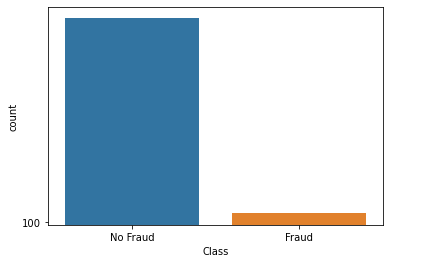

#### If we are making binary label, Fraud case will be '1', and no fraud case will be '0'.
#### Then, the case of '1' label; fraud case will be evidently lower, which will hurt the model

### One technique is to either lower the large one <- Undersampling
### Or increase the small one <- Oversampling

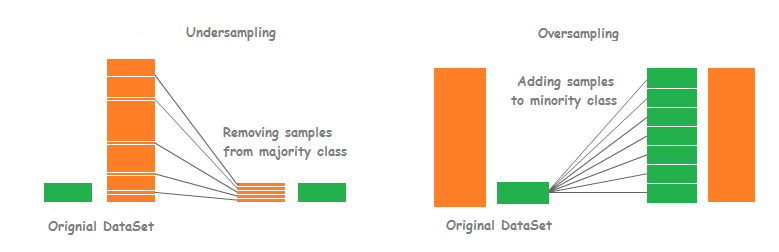

### Normally, oversampling is preferred because reducing the sampling is downsizing the number. Let's say you have 1,000 labels but then if you downsize it to 100.. Do you want to get rid of 90% of your data?

#### For, oversampling we use SMOTE (Sysnthetic Minority Over-sampling Technique), which randomly pick a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

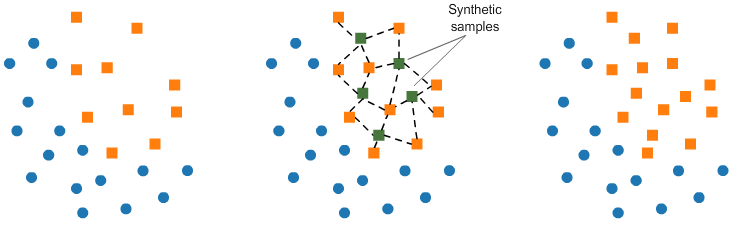

### Mechanism behind SMOTE
#### 1) Choose a minority class as the input vector
#### 2) Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
#### 3) Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
#### 4) Repeat the steps until data is balanced

## ----------------------------------------------------------------------------------------------------------------------

#### How to install it?
##### "conda install -c conda-forge imbalanced-learn"

## ----------------------------------------------------------------------------------------------------------------------
### Now we know the typology for imbalanced data
## Let's create Credit Card Fraud Detection ML Model!

In [3]:
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### We don't need the time feature so let's delete them

In [6]:
from sklearn.model_selection import train_test_split

# First make a copy version of Df
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

### To minimize the label variance we will be using gen_train_test_dataset()

In [7]:
# Function: Train and splete data after data curation process
def get_train_test_dataset(df=None):
    # Copying original and Curated Dataframe
    df_copy = get_preprocessed_df(df)
    # Last column will be the label(y), and other will be features
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( ) -> But uses Stratified splition
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # Return
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [8]:
print('Training Data Label Value Ratio')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('Testing Data Label Value Ratio')
print(y_test.value_counts()/y_test.shape[0] * 100)

Training Data Label Value Ratio
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
Testing Data Label Value Ratio
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


### You can see that label distribution is generally the same in both training and testing;
### However, as we worried Non-fraud (0) case is overwhelming the Fraud Case
We will resolve this issue later using SMOTHE

In [10]:
# Just code for evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # Add ROC-AUC 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Covariance Matrix')
    print(confusion)
    # ROC-AUC print 
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### We will be using Logistic Regression & LightGBM Based Models for Training

In [11]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# Use the pre-defined evaluation functions
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Covariance Matrix
[[85281    14]
 [   59    89]]
Accuracy: 0.9991, Precision: 0.8641, Recall: 0.6014,    F1: 0.7092, AUC:0.9560


In [12]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [3]:
# You might have to install LGBM
!pip install lightgbm

import lightgbm as lgb
print(f"LightGBM version: {lgb.__version__}")

LightGBM version: 4.6.0


In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### Which one is better?

#### 1) Logistic Regression
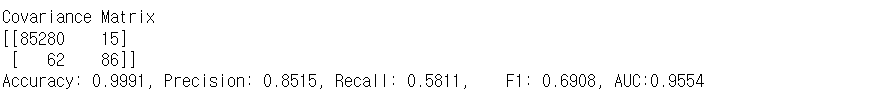

#### 2) LGBM
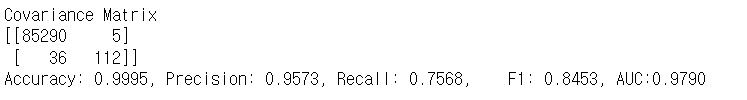

### Let's look at the variance of Feature (Amount in this case)

In [18]:
#You may need to install seaborn if you haven't
#!pip install seaborn 

import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

<Axes: xlabel='Amount', ylabel='Density'>

### Currently, a card transaction less than (inclusive) $1,000 is common, and the variance is left biased.
### If we are using linear models like logistic regression, it is more preferred to normalize the features.

In [20]:
from sklearn.preprocessing import StandardScaler
# Using Standard Scaler for normalization
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # Putting the scaled amount at the front
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # Erasing previous feature and time feature
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

### Using the scaled Amount feature and retrain models

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### Logistic Regression Performance ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM Performance ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


[Original]

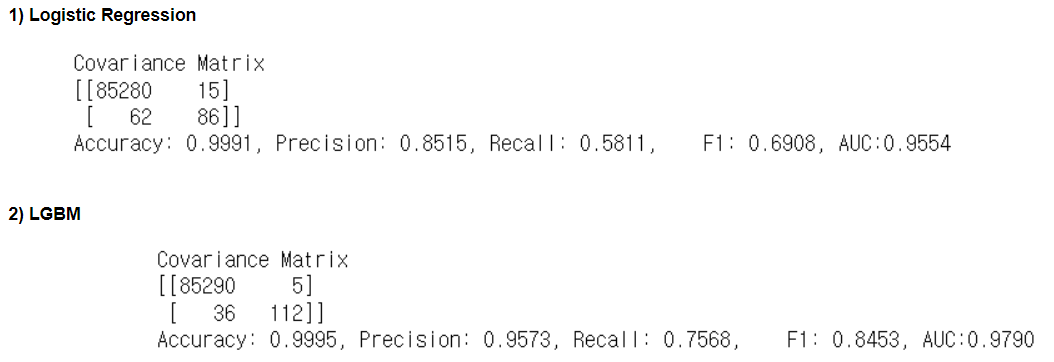

### But there's no huge improvements...(Yet..!)
Let's scale the features in different way

In [22]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # Using numpy's log1p
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('###  Logistic Regression Performance ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM Performance ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


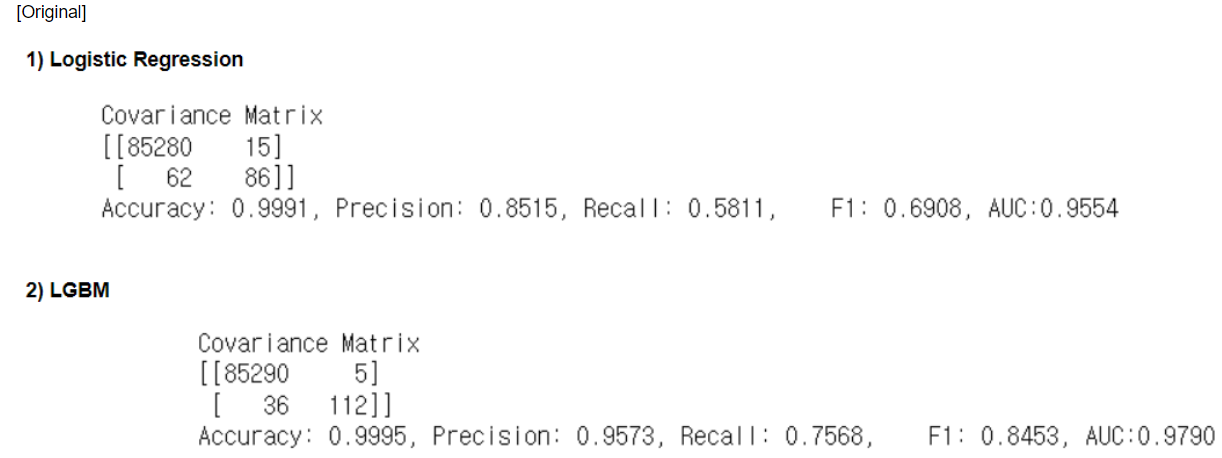

### It's better than before but, we are satisfied enough

## TIP: Remove Outliers
#### What is Outlier?
##### An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. 

### How to define outlier?
#### Calculate Inter Quantile Range
##### Quantile segment any distribution that’s ordered from low to high into four equal parts. The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.
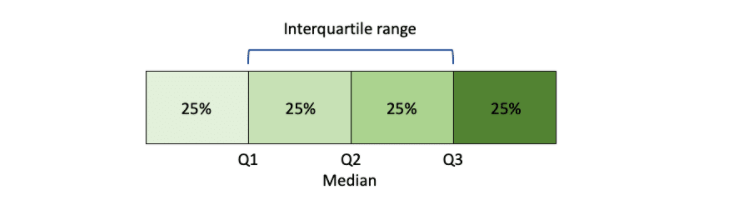

#### Nomrally....
###### Normal Variance from Q1 - (IQR * 1.5) - Q3 + (IQR * 1.5) 

In [24]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

<Axes: >

### Several features high high negative correlation

In [25]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # only pull out fraud case, and calculate percentile of Q1, and Q3 spot
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # multiplying 1.5 to calculated IQR, and add or subtract to Q3, and Q1
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # Defining Outlier Values
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [26]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('Outliers:', outlier_index)

Outliers: Index([8296, 8615, 9035, 9252], dtype='int64')


In [32]:
card_df.shape

(284807, 31)

Finally..! Retrain models after removing four outliers and scaling them by taking log

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # Adding pre-defined logics that removed the outliers
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### Logistic Regression Performance ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM Performance ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

###  If you compare them with draft models; Recall in LR improved from 60.81% to 67.12%
###  LightGBM also increased from 76.35% to 82.88%

In [7]:
#You may have to install imbalanced-learn if you do not have it. 

#!pip install imbalanced-learn

import imblearn
print(f"Imbalanced-learn version: {imblearn.__version__}")

Imbalanced-learn version: 0.14.0


# Don't be satisfied yet becaue we haven't resolved imbalance issue

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('Before SMOTE: ', X_train.shape, y_train.shape)
print('After SMOTE: ', X_train_over.shape, y_train_over.shape)
print('Label Variance After SMOTE: \n', pd.Series(y_train_over).value_counts())

### Please becareful to 'not' increase the testing labels

In [30]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

Covariance Matrix
[[82933  2362]
 [   11   135]]
Accuracy: 0.9722, Precision: 0.0541, Recall: 0.9247,    F1: 0.1022, AUC:0.9736


### Recall score improved; however, precision is only 5.4% <- very poor
#### It's because oversampling fraud case increased the case of predicting positive cases; remember? Precision is TP / (TP + FP)
#### Let's see what is happening

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

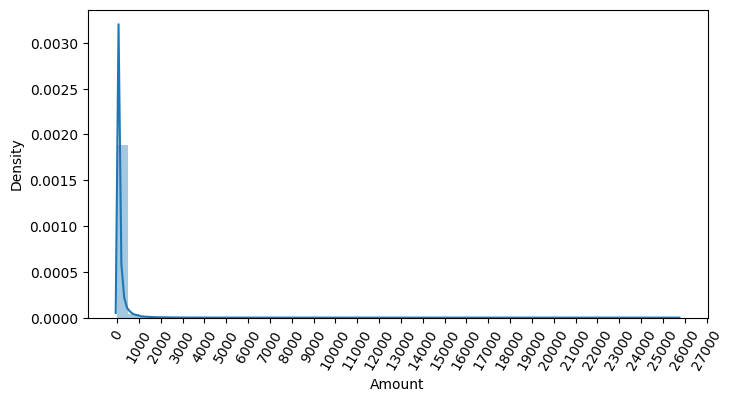

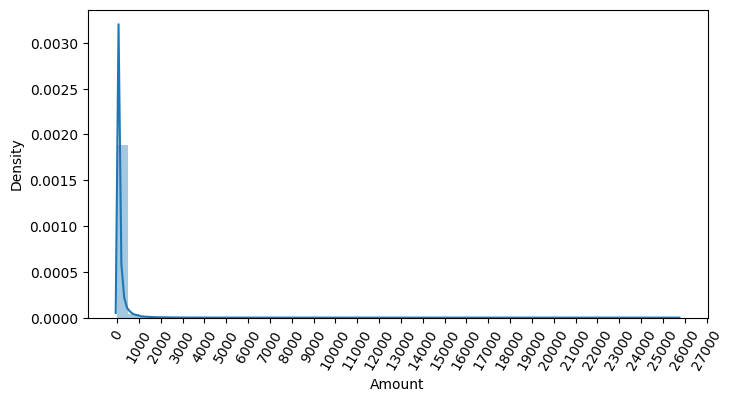

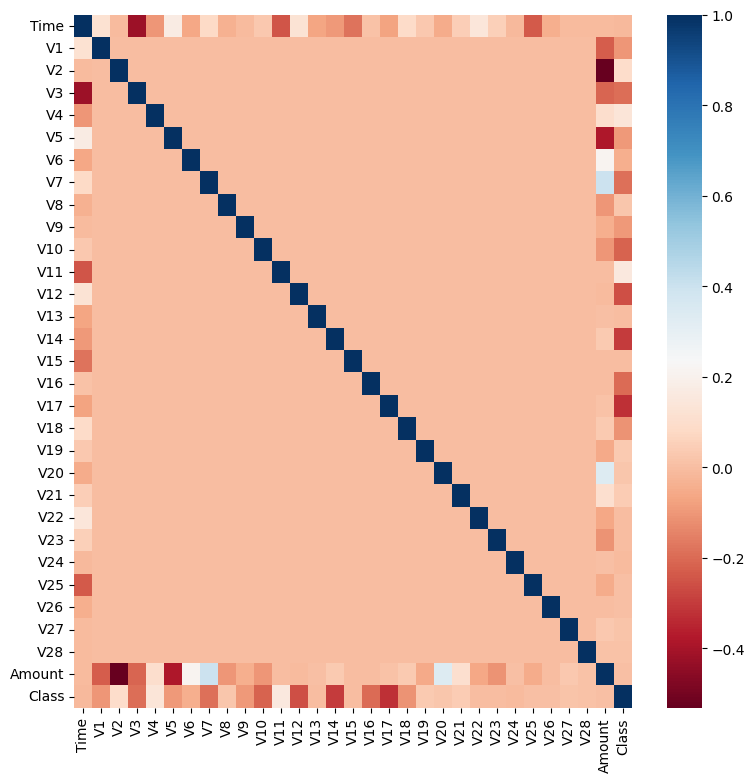

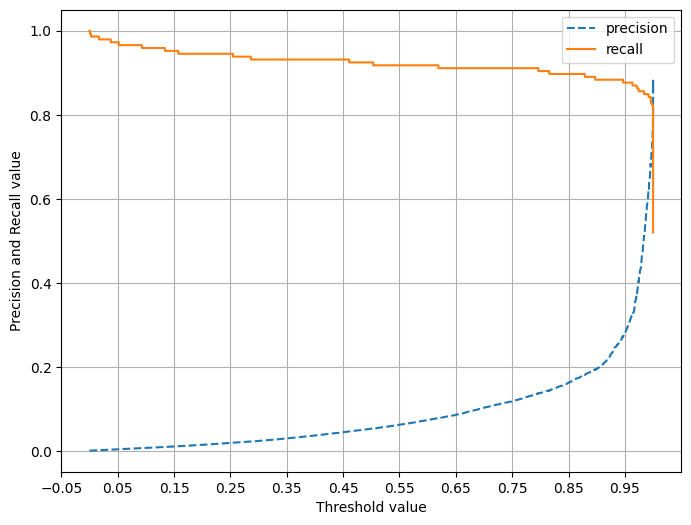

In [32]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

##### The precison suddenly decreases after threshold 0.99. I guess logistic regression is not suitable for SMOTE in this case
##### Let's check out LGBM

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

### Again, precision decreased but recall increased from 82.88% to 84.93%
### Normally, SMOTE works this way due to oversampling
### More decent SMOTE packages would help mitigate this gap variances

## ------------------------------------------------------------------------------------------------
## We have tested different Credit Card Fraud Detection Models.
## Which model performed the best? And Why?
### It's a homework for you to explore

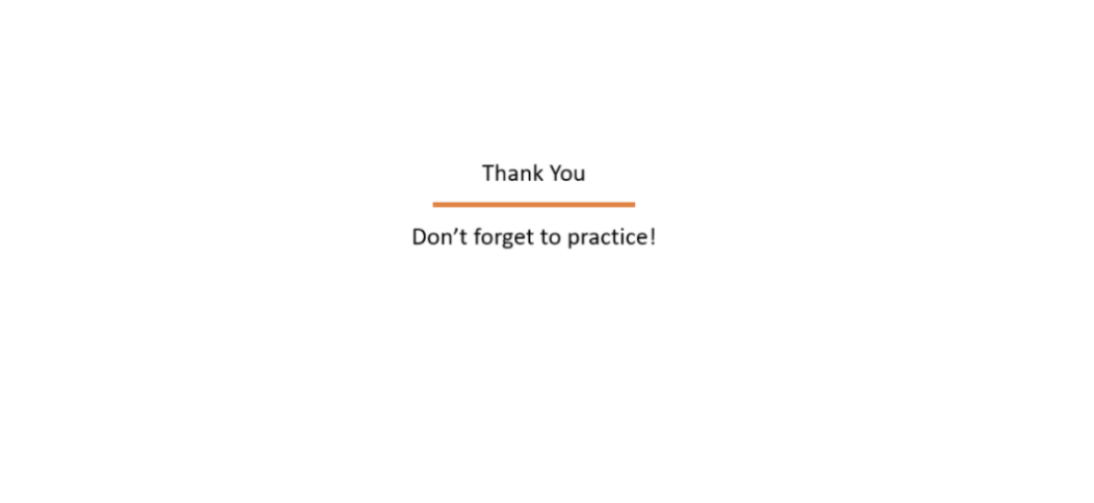